In [1]:
from network import network
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import time
import psutil
import csv

In [2]:
number_of_edges = 500
n = 1000
mem_list = []

実行回数： 1000 回、頂点数： 500 個
1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217.

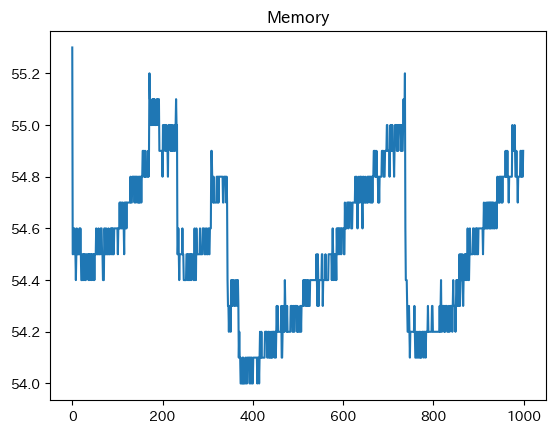

In [3]:
start = time.time()
print("実行回数：", n, "回、頂点数：", number_of_edges, "個")

for i in range(n):
    mem = psutil.virtual_memory() 
    df = network(number_of_edges)
    
    df.to_csv(f"data/{i}.csv")
        
    print(f"{i+1}. ", end="")
    mem_list.append(mem.percent)

end = time.time() - start
print("")
print("実行時間：", end)

plt.plot(mem_list)
plt.title('Memory')
plt.show()

## ファイルから読み取る

In [4]:
def calc_value(df, colum):
    sorted_df = df.sort_values(colum, ascending=False).head(50)
    count = len(sorted_df[sorted_df["trust"] == 1])
    
    return (count / 50.0 * 100.0)

In [5]:
l = list()

for i in range(n):
    df = pd.read_csv(f"data/{i}.csv")
    
    count = 0
    for index, row in df.head(50).iterrows():
        if row["trust"] == 1:
            count += 1
    original = count / 50.0 * 100.0
    
    score = calc_value(df, "score")
    dc_score = calc_value(df, "dc_score")
    bc_score = calc_value(df, "bc_score")
    pr_score = calc_value(df, "pr_score")
    
    l.append([original, score, dc_score, bc_score, pr_score])

result = pd.DataFrame(data=l, columns=["original", "score", "dc_score", "bc_score", "pr_score"])

In [6]:
print("各中心性によって求められる信用できる人を当てた正解率の平均[%]")
print(result.mean())
print("-"*50)

print("標準偏差")
print(result.std())

各中心性によって求められる信用できる人を当てた正解率の平均[%]
original    69.846
score       80.718
dc_score    81.036
bc_score    73.908
pr_score    79.500
dtype: float64
--------------------------------------------------
標準偏差
original    6.473190
score       9.593566
dc_score    9.660022
bc_score    7.230201
pr_score    9.160891
dtype: float64


- 各中心性によって求められる信用できる人を当てた正解率の平均[%]
- 標準偏差
|中心性の項目|平均|標準偏差|
|---|---|---|
|ランダム|69.846|6.473190|
|総スコア|80.718|9.593566|
|次元中心性|81.036|9.660022|
|媒介中心性|73.908|7.230201|
|PageRank|79.500|9.160891|

## ヒストグラムによる正規分布の判定

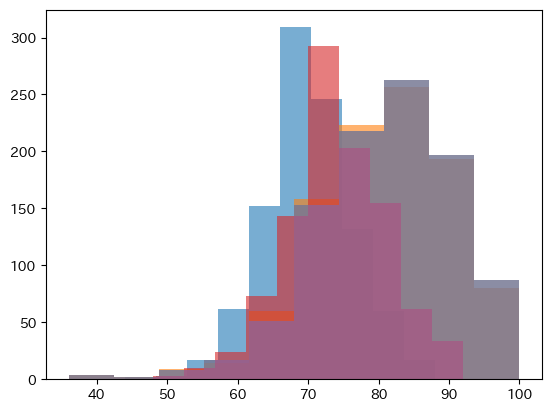

In [7]:
plt.hist(result["original"], alpha=0.6)
plt.hist(result["score"], alpha=0.6)
plt.hist(result["dc_score"], alpha=0.6)
plt.hist(result["bc_score"], alpha=0.6)
plt.hist(result["dc_score"], alpha=0.6)
plt.show()

## 正規性の検定(シャピロ-ウィルク検定)
- 帰無仮説：母集団が正規分布である
- 対立仮設：母集団が正規分布でない
- 有意水準：5%

In [8]:
for key in result:
    w, p = stats.shapiro(result[key])
    print("p値：", p)
    if p < 0.05:
        print(f"{key}の母数団が正規分布ではない")
    else:
        print(f"{key}の母数団が正規分布である")
    print("-" * 50)

p値： 6.272736641221854e-07
originalの母数団が正規分布ではない
--------------------------------------------------
p値： 8.217066621313968e-15
scoreの母数団が正規分布ではない
--------------------------------------------------
p値： 1.957426225501855e-15
dc_scoreの母数団が正規分布ではない
--------------------------------------------------
p値： 6.291735189734027e-06
bc_scoreの母数団が正規分布ではない
--------------------------------------------------
p値： 1.461869687802153e-12
pr_scoreの母数団が正規分布ではない
--------------------------------------------------


## 平均値の差の検定(マン・ホイットニー検定)
- 帰無仮説H0：scoreの母代表値はoriginalの母集団より大きくない
- 対立仮説H1：scoreの母代表値はoriginalの母集団より大きい
- 有意水準：5%

In [9]:
for key in result:
    s, p = stats.mannwhitneyu(result[key], result["original"], alternative="greater")
    # 媒介中心性は正規分布に従うので省く
    if key == "original":
        continue
    print(key)
    print("検定統計量：", s, "、p値：", p)
    if p < 0.05:
        print("scoreの母代表値はoriginalの母集団より大きい")
    else:
        print("scoreの母代表値はoriginalの母集団より大きくない")
    print("-" * 50)

score
検定統計量： 832534.0 、p値： 4.459762284452292e-147
scoreの母代表値はoriginalの母集団より大きい
--------------------------------------------------
dc_score
検定統計量： 839496.0 、p値： 3.5035443815000007e-153
scoreの母代表値はoriginalの母集団より大きい
--------------------------------------------------
bc_score
検定統計量： 661465.0 、p値： 2.015286790576922e-36
scoreの母代表値はoriginalの母集団より大きい
--------------------------------------------------
pr_score
検定統計量： 811091.5 、p値： 4.566856180431839e-129
scoreの母代表値はoriginalの母集団より大きい
--------------------------------------------------


## 等分散性の検定(F検定)
- 帰無関数：母分散は等しい
- 対立仮設：母分散は等しくない

In [10]:
# 方法1
# lp = stats.f.cdf(f, len(result["bc_score"])-1, len(result["original"])-1)
# p = 1 - lp

# 方法2
for key in result:
    f1 = stats.tvar(result[key]) / stats.tvar(result["bc_score"])
    f2 = stats.tvar(result[key]) / stats.tvar(result["original"])
    
    if f1 > 1:
        f = f1
    else:
        f = f2
    
    p1 = stats.f.cdf(f, len(result[key])-1, len(result["original"])-1)
    p2 = stats.f.sf(f, len(result[key])-1, len(result["original"])-1)
    p = min(p1, p2) * 2

    print(key, "、検定統計量：", s, "、p値：", p)
    if p < 0.05:
        print("母分散は等しくない")
    else:
        print("母分散は等しい")

original 、検定統計量： 811091.5 、p値： 1.0000000000003904
母分散は等しい
score 、検定統計量： 811091.5 、p値： 6.775708556782165e-19
母分散は等しくない
dc_score 、検定統計量： 811091.5 、p値： 9.695000153894922e-20
母分散は等しくない
bc_score 、検定統計量： 811091.5 、p値： 0.0004807899722108543
母分散は等しくない
pr_score 、検定統計量： 811091.5 、p値： 9.747025712177417e-14
母分散は等しくない


## スチューデントのt検定
- 帰無仮説：平均値に差はない
- 対立仮設：平均値に差がある
- 有意水準：5%

In [11]:
for key in result:
    s, p = stats.ttest_ind(result["original"], result[key])
    print(key, "、検定統計量：", s, "、p値：", p)
    if p < 0.05:
        print("平均値に差がある")
    else:
        print("平均値に差があるとは言えない")

original 、検定統計量： 0.0 、p値： 1.0
平均値に差があるとは言えない
score 、検定統計量： -29.706836511712144 、p値： 6.23783327443685e-161
平均値に差がある
dc_score 、検定統計量： -30.43073915338319 、p値： 1.904856490084641e-167
平均値に差がある
bc_score 、検定統計量： -13.236257030915075 、p値： 2.1306963673349868e-38
平均値に差がある
pr_score 、検定統計量： -27.216066922408757 、p値： 5.2560332376744766e-139
平均値に差がある


## ウェルチのt検定
- 帰無仮説：平均値に差はない
- 対立仮設：平均値に差がある
- 有意水準：5%

In [12]:
for key in result:
    s, p = stats.ttest_ind(result[key], result["original"], equal_var=False)

    print(key, "、検定統計量：", s, "、p値：", p)
    if p < 0.05:
        print("平均値に差がある")
    else:
        print("平均値に差があるとは言えない")

original 、検定統計量： 0.0 、p値： 1.0
平均値に差があるとは言えない
score 、検定統計量： 29.70683651171214 、p値： 2.0629481441409605e-157
平均値に差がある
dc_score 、検定統計量： 30.43073915338319 、p値： 1.5454279083681827e-163
平均値に差がある
bc_score 、検定統計量： 13.236257030915075 、p値： 2.2223168166262932e-38
平均値に差がある
pr_score 、検定統計量： 27.216066922408757 、p値： 7.160698649331313e-137
平均値に差がある
